<h1 style="color:#04AA6D"><center>Greyscale Clustring usin K-means algorithm</center></h1>
<span style="color:#ACAF50"><center>Omar Farooq</center></span>
<h3 style="color:#000080"><center>Clustering is performed wrt the RGB channels. The image is then transformed to only contain k colors</center></h3>

In [2]:
import sys
import random
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np.set_printoptions(threshold=sys.maxsize)

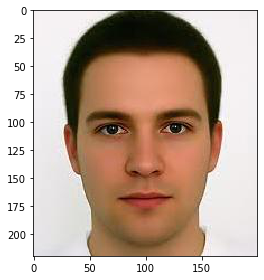

In [4]:
image = imread('face.jpg')
imshow(image)

In [22]:
print('gray level range:',image.min(), image.max())
print('mean:', image.mean())
original_shape =  image.shape
print(original_shape)

gray level range: 0 255
mean: 154.37554545454546
(220, 200, 3)


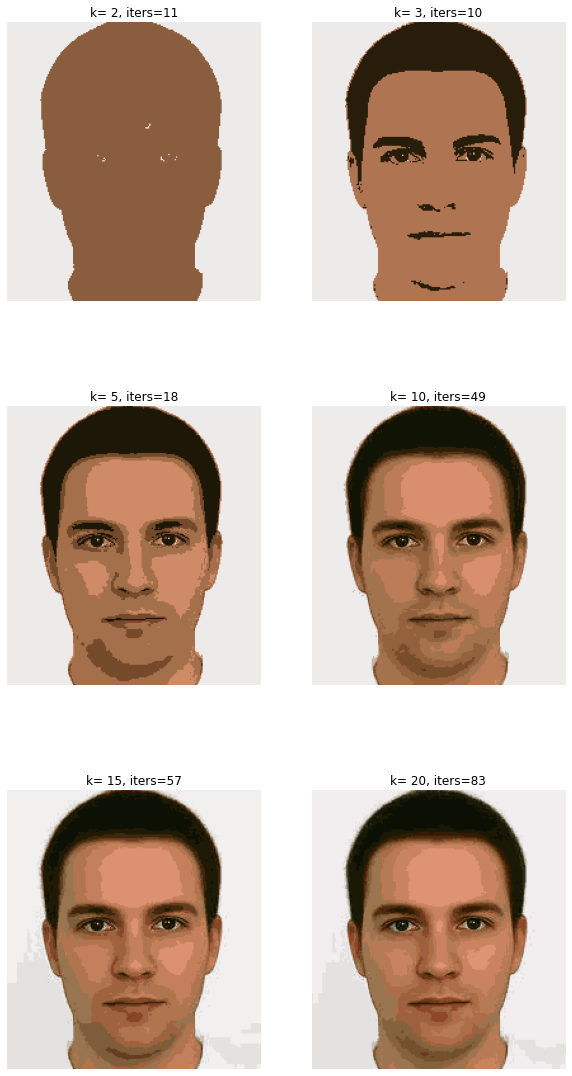

In [55]:

def getVal(arr, assignment, clusters, i):
    vals = arr[np.argwhere(assignment == i).flatten(), :]
    if vals.size != 0:
#         print('arr in cluster',i, ':\n',np.unique(vals))
        return vals
    else:
        return clusters[i]
plt.figure(figsize=(10,20))
j=0    
for numClusters in [2, 3, 5, 10, 15, 20]:
    random.seed(0)
    arr = np.hstack((image[:,:,0].reshape((-1, 1)), image[:,:,1].reshape((-1, 1)), image[:,:,2].reshape((-1, 1))))
    s = len(arr)
    clusters = np.random.randint(256, size=(numClusters, 3))
    clusters_new = np.random.randint(256, size=(numClusters, 3))
    distance_matrix = np.zeros((s, numClusters))
    assignment = np.random.randint(numClusters, size=s)
    # print('init @ clusters:\n', clusters)
    count = 1
    while True:
    #     print('iteration', count)
        for i in range(numClusters):
            distance_matrix[:, i] = np.sum(np.square(clusters[i, :]-arr), axis=1)

        assignment = np.argmin(distance_matrix, axis=1)
    #     print('assignment', np.unique(assignment))
    #     print('clusters', clusters)
        for i in range(numClusters):
    #         print('setting cluster', i)
            vals = getVal(arr, assignment, clusters, i)
    #         if(np.unique(vals).size>200):
    #             print('*****flawed assignment******\n')
    #             print(pd.DataFrame.from_records(np.hstack((distance_matrix[np.argwhere(assignment == i), :], arr[np.argwhere(assignment == i),:]))))
            clusters_new[i, :] = np.mean(vals, axis=0)
        if (clusters_new == clusters).all():
            break
        else:
            clusters = clusters_new.copy()
            count += 1
    j+=1
    plt.subplot(3, 2, j)
    plt.title('k= '+str(numClusters)+', iters='+str(count))
    plt.axis('off')
    plt.imshow(np.stack([clusters[assignment, 0].reshape(original_shape[0], original_shape[1]), clusters[assignment, 1].reshape(original_shape[0], original_shape[1]), clusters[assignment, 2].reshape(original_shape[0], original_shape[1])], axis=2)) 

<h3 style="color:#395697;"><center>Trying with more grey levels</center></h3>

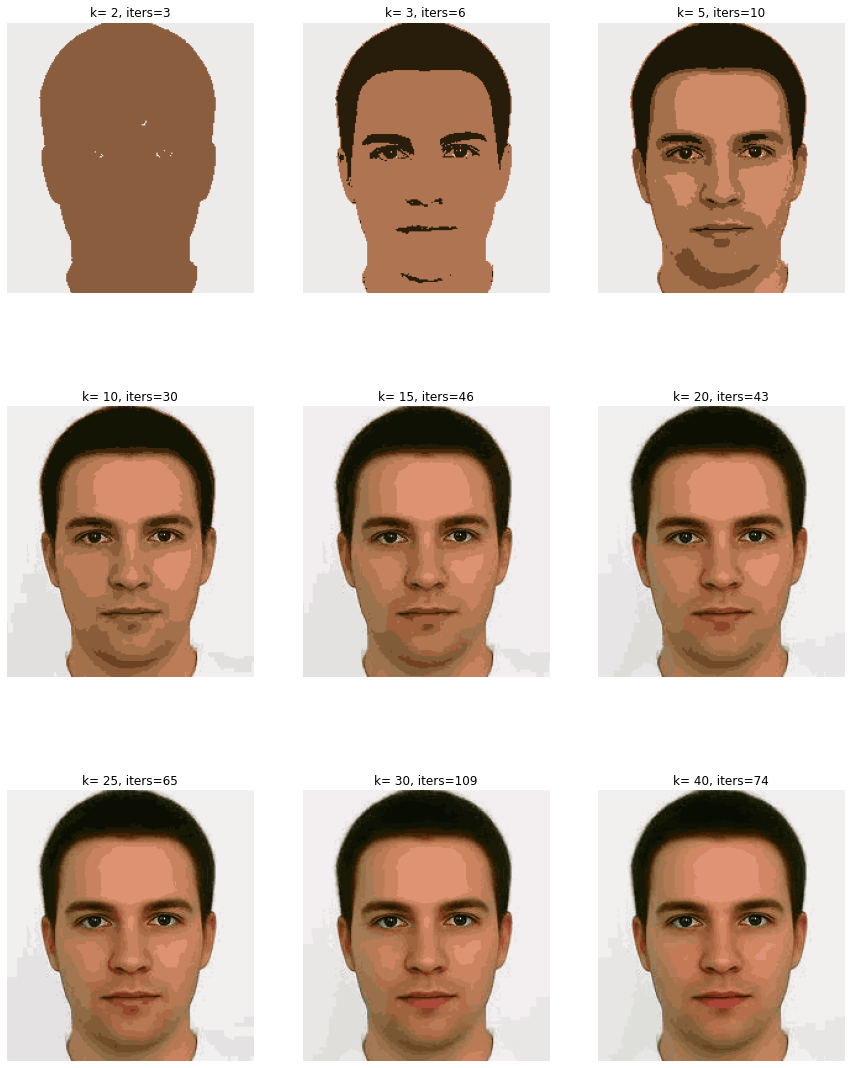

In [59]:

def getVal(arr, assignment, clusters, i):
    vals = arr[np.argwhere(assignment == i).flatten(), :]
    if vals.size != 0:
#         print('arr in cluster',i, ':\n',np.unique(vals))
        return vals
    else:
        return clusters[i]
plt.figure(figsize=(15,20))
j=0    
for numClusters in [2, 3, 5, 10, 15, 20, 25, 30, 40]:
    random.seed(0)
    arr = np.hstack((image[:,:,0].reshape((-1, 1)), image[:,:,1].reshape((-1, 1)), image[:,:,2].reshape((-1, 1))))
    s = len(arr)
    clusters = np.random.randint(256, size=(numClusters, 3))
    clusters_new = np.random.randint(256, size=(numClusters, 3))
    distance_matrix = np.zeros((s, numClusters))
    assignment = np.random.randint(numClusters, size=s)
    # print('init @ clusters:\n', clusters)
    count = 1
    while True:
    #     print('iteration', count)
        for i in range(numClusters):
            distance_matrix[:, i] = np.sum(np.square(clusters[i, :]-arr), axis=1)

        assignment = np.argmin(distance_matrix, axis=1)
    #     print('assignment', np.unique(assignment))
    #     print('clusters', clusters)
        for i in range(numClusters):
    #         print('setting cluster', i)
            vals = getVal(arr, assignment, clusters, i)
    #         if(np.unique(vals).size>200):
    #             print('*****flawed assignment******\n')
    #             print(pd.DataFrame.from_records(np.hstack((distance_matrix[np.argwhere(assignment == i), :], arr[np.argwhere(assignment == i),:]))))
            clusters_new[i, :] = np.mean(vals, axis=0)
        if (clusters_new == clusters).all():
            break
        else:
            clusters = clusters_new.copy()
            count += 1
    j+=1
    plt.subplot(3, 3, j)
    plt.title('k= '+str(numClusters)+', iters='+str(count))
    plt.axis('off')
    plt.imshow(np.stack([clusters[assignment, 0].reshape(original_shape[0], original_shape[1]), clusters[assignment, 1].reshape(original_shape[0], original_shape[1]), clusters[assignment, 2].reshape(original_shape[0], original_shape[1])], axis=2)) 

We can see that as we approach larger cluster sizes, the image begins to become increasingly smoother. However the number of clusters with zero pixels also increases. Perhaps a more structured approach at cluster initialization could help. Another approch to remove the grayscale counters could be to introduce a very small amount of gaussian random noise into the pixels. If noise is introduced using the normal distribution, it will produce large values, though very infrequently. These would show up as brght spots on the image, reducing its quality.  

<h1 style="color:purple;"><center>The End</center></h1>